#Graph analysis and visualization of the GOT Books using NetworkX and Pivys

In [ ]:
!pip install pyvis

In [ ]:
!pip install python-louvain

In [3]:
from pyvis.network import Network
from IPython.core.display import display, HTML
import pandas as pd
import networkx as nx
import numpy as np
import random
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
from pathlib import Path

In [20]:
def func_graph(df,G): #Graph function
  pos = nx.kamada_kawai_layout(G) 
  net = Network(notebook=True,bgcolor="#222222",font_color="white",cdn_resources='remote')
  node_degree = dict(G.degree)
  degree_values = np.array(list(node_degree.values()))

  # Scale the sizes
  min_size = 15  
  max_size = 40

  # Normalize values
  normalized_sizes = (degree_values - np.min(degree_values)) / (np.max(degree_values) - np.min(degree_values))

  # Calculate the sizes normalized
  node_sizes = min_size + normalized_sizes * (max_size - min_size)

  
  node_size_dict = dict(zip(G.nodes(), node_sizes))
  nx.set_node_attributes(G, node_size_dict, "size")
  net.from_nx(G)

  net.force_atlas_2based(gravity=-100,overlap=0.7) #Avoid overlapping
  net.toggle_physics(True)
  
  return net



def graph_measures(G): #function to create a rank using node properties

  degree_centrality = nx.degree_centrality(G)
  degree_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])
  betweenness_centrality = nx.betweenness_centrality(G)
  betweenness_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['Betweenness Centrality'])
  closeness_centrality = nx.closeness_centrality(G)
  closeness_df = pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['Closeness Centrality'])

  # Sort the DataFrames by centrality in descending order and select the top 10 nodes
  top_10_degree = degree_df.sort_values('Degree Centrality', ascending=False).head(10)
  top_10_betweenness = betweenness_df.sort_values('Betweenness Centrality', ascending=False).head(10)
  top_10_closeness = closeness_df.sort_values('Closeness Centrality', ascending=False).head(10)

  # Create a 1x3 subplot grid
  fig, axs = plt.subplots(1, 3, figsize=(16, 4))

  # Plot degree centrality
  axs[0].bar(top_10_degree.index, top_10_degree['Degree Centrality'])
  axs[0].set_title('Degree Centrality')
  axs[0].set_xlabel('Nodes')
  axs[0].set_ylabel('Degree Centrality')
  axs[0].tick_params(axis='x', rotation=45)

  # Plot betweenness centrality
  axs[1].bar(top_10_betweenness.index, top_10_betweenness['Betweenness Centrality'])
  axs[1].set_title('Betweenness Centrality')
  axs[1].set_xlabel('Nodes')
  axs[1].set_ylabel('Betweenness Centrality')
  axs[1].tick_params(axis='x', rotation=45)

  # Plot closeness centrality
  axs[2].bar(top_10_closeness.index, top_10_closeness['Closeness Centrality'])
  axs[2].set_title('Closeness Centrality')
  axs[2].set_xlabel('Nodes')
  axs[2].set_ylabel('Closeness Centrality')
  axs[2].tick_params(axis='x', rotation=45)

  return plt

##First book relationship visualization

In [21]:
relationship_df = pd.read_csv("/content/Relationships/1 - A Game of Thrones_relationship.csv")

relationship_df = relationship_df.groupby(["source","target"],sort = False, as_index = False).sum()
G = nx.from_pandas_edgelist(relationship_df,source="source",target="target",edge_attr="value",create_using=nx.Graph())
net = func_graph(relationship_df,G)
net.show("GOT_1.html")

display(HTML('GOT_1.html'))

GOT_1.html


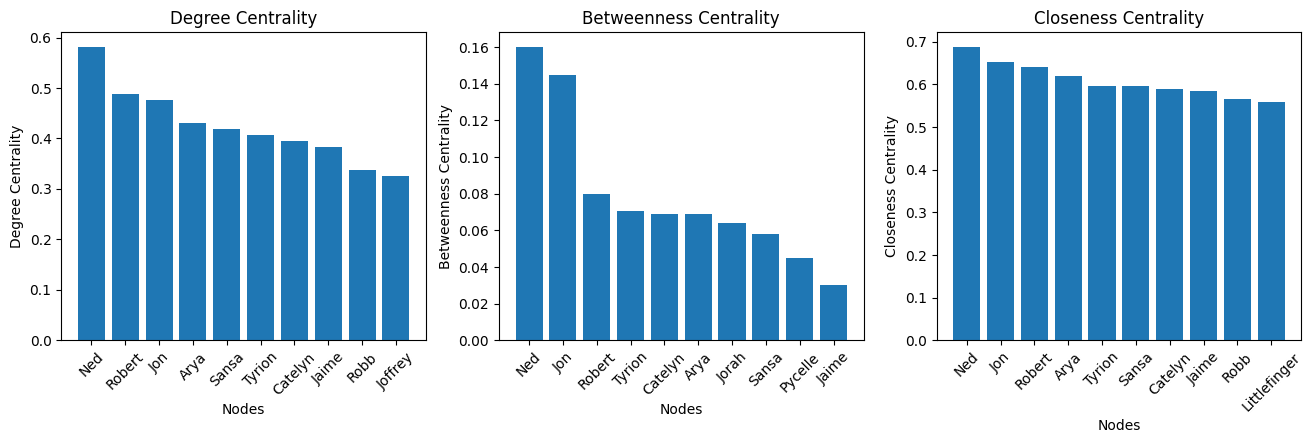

In [ ]:
graph_measures = graph_measures(G)
graph_measures.show()

In [ ]:
communities = community_louvain.best_partition(G)
nx.set_node_attributes(G,communities,"group")
net = func_graph(relationship_df,G)
net.show("GOT_1_communities.html")

display(HTML('GOT_1_communities.html'))

GOT_1_communities.html


##Second book relationship visualization

In [9]:
relationship_df = pd.read_csv("/content/Relationships/2 - A Clash of Kings_relationship.csv")

relationship_df = relationship_df.groupby(["source","target"],sort = False, as_index = False).sum()
G2 = nx.from_pandas_edgelist(relationship_df,source="source",target="target",edge_attr="value",create_using=nx.Graph())
net2 = func_graph(relationship_df,G2)
net2.show("GOT_2.html")

display(HTML('GOT_2.html'))

GOT_2.html


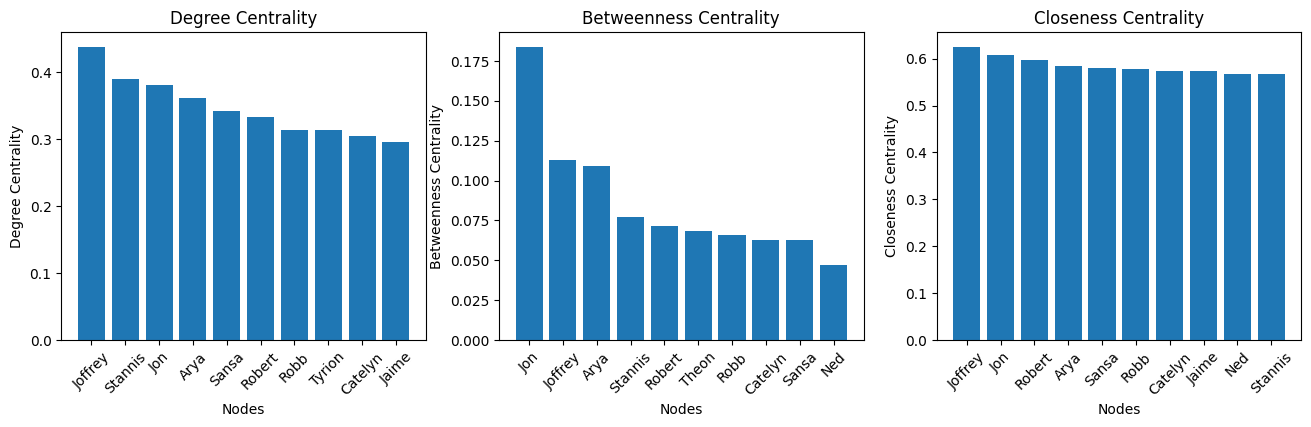

In [ ]:
graph_measures = graph_measures(G2)
graph_measures.show()

In [ ]:
communities = community_louvain.best_partition(G2)
nx.set_node_attributes(G2,communities,"group")
net2 = func_graph(relationship_df,G2)
net2.show("GOT_2_communities.html")

display(HTML('GOT_2_communities.html'))

GOT_2_communities.html


##Third book relationship visualization

In [10]:
relationship_df = pd.read_csv("/content/Relationships/3 - A Storm of Swords_relationship.csv")

relationship_df = relationship_df.groupby(["source","target"],sort = False, as_index = False).sum()
G3 = nx.from_pandas_edgelist(relationship_df,source="source",target="target",edge_attr="value",create_using=nx.Graph())
net3 = func_graph(relationship_df,G3)
net3.show("GOT_3.html")

display(HTML('GOT_3.html'))

GOT_3.html


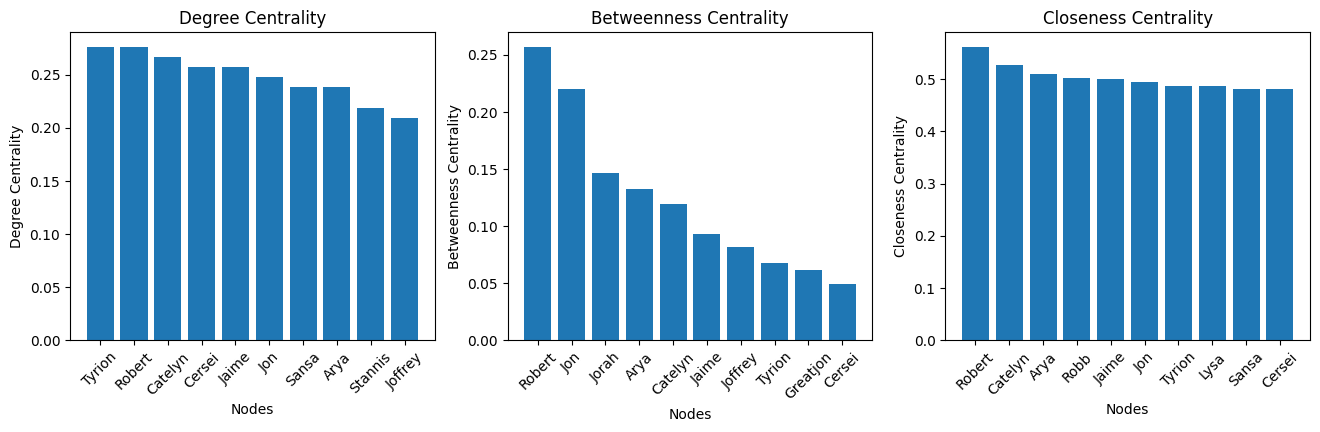

In [ ]:
graph_measures = graph_measures(G3)
graph_measures.show()

In [ ]:
communities = community_louvain.best_partition(G3)
nx.set_node_attributes(G3,communities,"group")
net3 = func_graph(relationship_df,G3)
net3.show("GOT_3_communities.html")

display(HTML('GOT_3_communities.html'))

GOT_3_communities.html


##Fourth book relationship visualization

In [11]:
relationship_df = pd.read_csv("/content/Relationships/4 - A Feast for Crows_relationship.csv")

relationship_df = relationship_df.groupby(["source","target"],sort = False, as_index = False).sum()
G4 = nx.from_pandas_edgelist(relationship_df,source="source",target="target",edge_attr="value",create_using=nx.Graph())
net4 = func_graph(relationship_df,G4)
net4.show("GOT_4.html")

display(HTML('GOT_4.html'))

GOT_4.html


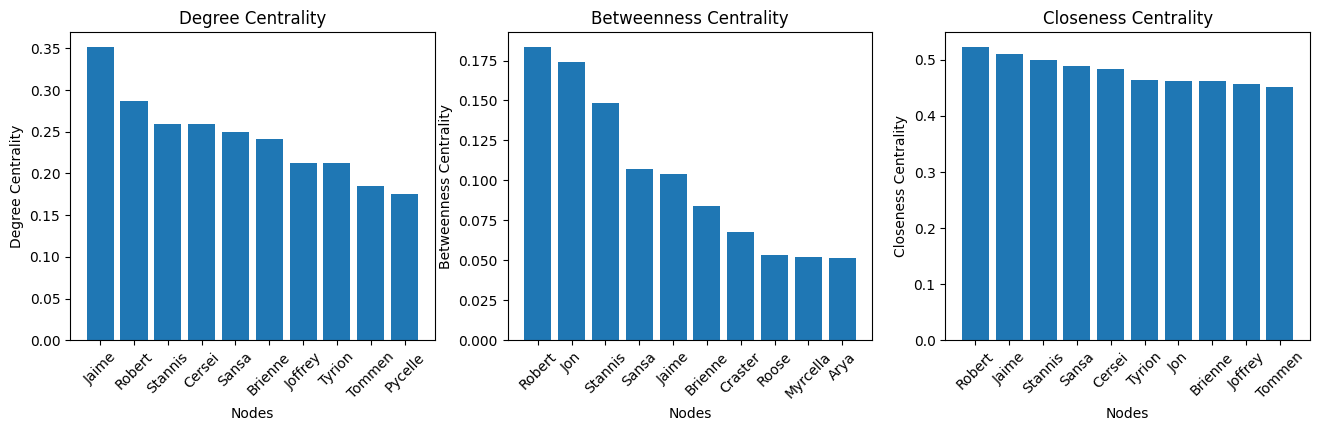

In [ ]:
graph_measures = graph_measures(G4)
graph_measures.show()

In [ ]:
communities = community_louvain.best_partition(G4)
nx.set_node_attributes(G4,communities,"group")
net4 = func_graph(relationship_df,G4)
net4.show("GOT_4_communities.html")

display(HTML('GOT_4_communities.html'))

GOT_4_communities.html


##Fifth book relationship visualization

In [12]:
relationship_df = pd.read_csv("/content/Relationships/5 - A Dance with Dragons_relationship.csv")

relationship_df = relationship_df.groupby(["source","target"],sort = False, as_index = False).sum()
G5 = nx.from_pandas_edgelist(relationship_df,source="source",target="target",edge_attr="value",create_using=nx.Graph())
net = func_graph(relationship_df,G5)
net.show("GOT_5.html")

display(HTML('GOT_5.html'))

GOT_5.html


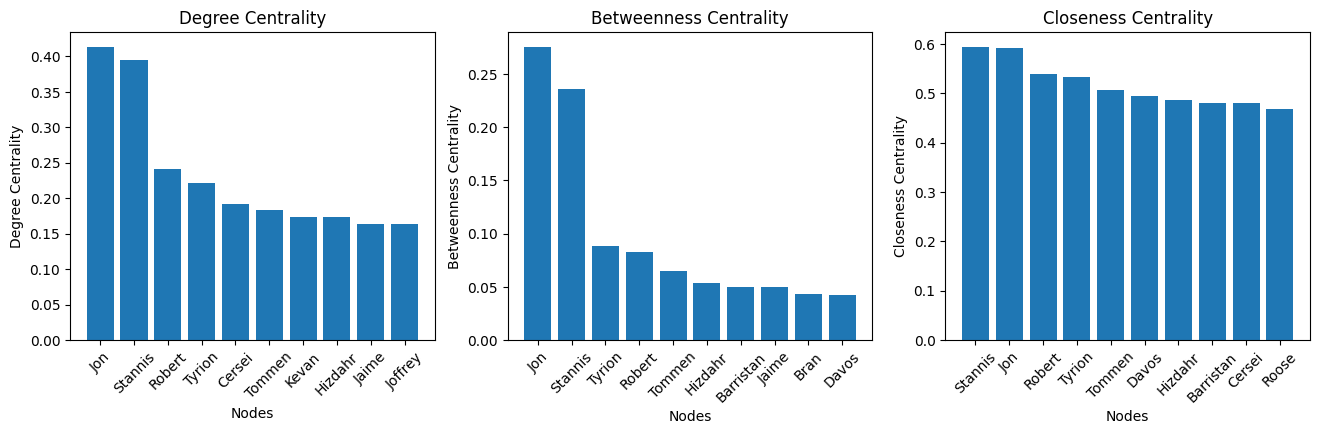

In [ ]:
graph_measures = graph_measures(G5)
graph_measures.show()

In [ ]:
communities = community_louvain.best_partition(G5)
nx.set_node_attributes(G5,communities,"group")
net = func_graph(relationship_df,G5)
net.show("GOT_5_communities.html")

display(HTML('GOT_5_communities.html'))

GOT_5_communities.html


#All books together for visualization

###Character importance trough books

In [7]:
path = Path('/content/Relationships')
arquivos_csv = []

# Get all relationship csv's
for arquivo in path.glob('*.csv'):
    arquivos_csv.append(arquivo)

# CSVs to Dataframes
dataframes = []
for arquivo_csv in arquivos_csv:
    df = pd.read_csv(arquivo_csv)
    dataframes.append(df)

# Packing all DF together
all_relationship_df = pd.concat(dataframes, ignore_index=True)

all_relationship_df = all_relationship_df.groupby(["source","target"],sort = False, as_index = False).sum()

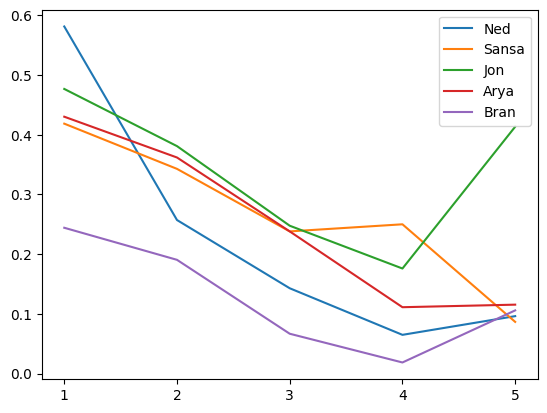

In [19]:
# Creating a list of degree centrality of all the books
books_graph=[G,G2,G3,G4,G5]
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 stark characters
degree_evol_df[["Ned", "Sansa", "Jon", "Arya", "Bran"]].plot()
plt.xticks(range(5), range(1, 6))
plt.show()

In [ ]:
G_total = nx.from_pandas_edgelist(all_relationship_df,source="source",target="target",edge_attr="value",create_using=nx.Graph())
net_total = func_graph(all_relationship_df,G_total)
net_total.show("GOT_All_Books.html")

display(HTML('GOT_All_Books.html'))

GOT_All_Books.html


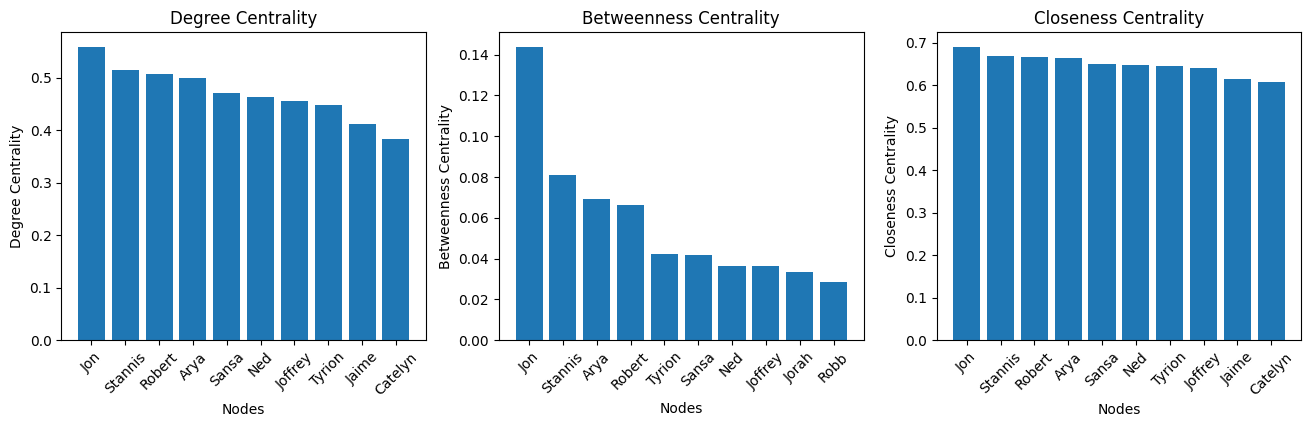

In [ ]:
graph_measures = graph_measures(G_total)
graph_measures.show()

In [ ]:
communities = community_louvain.best_partition(G_total)
nx.set_node_attributes(G_total,communities,"group")
net_total = func_graph(all_relationship_df,G_total)
net_total.show("GOT_All_Books_communities.html")

display(HTML('GOT_All_Books_communities.html'))

GOT_All_Books_communities.html
